## QASM

[OpenQASM3](https://medium.com/qiskit/a-new-openqasm-for-a-new-era-of-dynamic-circuits-87f031cac49) is a new iteration of quantum assembler language, addresses problems of:
- dynamic circuits (those which can have classic control, not pure quantum)
- adding pulses (low level interactions), not only gates.
- time aware (decoherence time).


In [1]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit, Aer, execute
qc = QuantumCircuit(2)
qc.h(1)
qc.cx(1, 0)
qc.measure_all()
code = qc.qasm()

with open('bell.qasm', 'w') as f:
    f.write(code)

# These are parser utilities
from qiskit.qasm import Qasm
qasm_obj = Qasm('bell.qasm')
prog = qasm_obj.parse()
tokens = qasm_obj.generate_tokens()

# this is usage
print(QuantumCircuit.from_qasm_file('bell.qasm').draw())
print(QuantumCircuit.from_qasm_str(code).draw())

print(code)

             ┌───┐ ░ ┌─┐   
   q_0: ─────┤ X ├─░─┤M├───
        ┌───┐└─┬─┘ ░ └╥┘┌─┐
   q_1: ┤ H ├──■───░──╫─┤M├
        └───┘      ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
             ┌───┐ ░ ┌─┐   
   q_0: ─────┤ X ├─░─┤M├───
        ┌───┐└─┬─┘ ░ └╥┘┌─┐
   q_1: ┤ H ├──■───░──╫─┤M├
        └───┘      ░  ║ └╥┘
meas: 2/══════════════╩══╩═
                      0  1 
OPENQASM 2.0;
include "qelib1.inc";
qreg q[2];
creg meas[2];
h q[1];
cx q[1],q[0];
barrier q[0],q[1];
measure q[0] -> meas[0];
measure q[1] -> meas[1];



# Barriers

Visual barriers, not considered in computations.

In [2]:
qr = QuantumRegister(5, name="q")
qc = QuantumCircuit(qr)
qc.x(0)

# full barrier
qc.barrier()
qc.x(1)

# 1-qubit
qc.barrier(1)
qc.x(2)
qc.h(2)

# multi-qubit
qc.barrier(2, 4)
qc.x(4)
b = qc.barrier([1, 2, 4])
qc.z(3)

# works with qubit objects also
qc.barrier(qr[2:4])
qc.draw()

┌───┐ ░                         
q_0: ┤ X ├─░─────────────────────────
     └───┘ ░ ┌───┐  ░           ░    
q_1: ──────░─┤ X ├──░───────────░────
           ░ ├───┤┌───┐ ░       ░  ░ 
q_2: ──────░─┤ X ├┤ H ├─░───────░──░─
           ░ ├───┤└───┘ ░       ░  ░ 
q_3: ──────░─┤ Z ├─────────────────░─
           ░ └───┘      ░ ┌───┐ ░  ░ 
q_4: ──────░────────────░─┤ X ├─░────
           ░            ░ └───┘ ░

## TODO

Draw a fur tree like this.

In [3]:
# your code here

            ░  ░                   
q_0: ───────░──░───────────────────
            ░  ░  ░  ░             
q_1: ───────░──░──░──░─────────────
            ░  ░  ░  ░  ░  ░       
q_2: ───────░────────░──░──░───────
      ░  ░  ░        ░  ░  ░  ░  ░ 
q_3: ─░──░──░──────────────░──░──░─
      ░  ░  ░        ░  ░  ░  ░  ░ 
q_4: ───────░────────░──░──░───────
            ░  ░  ░  ░  ░  ░       
q_5: ───────░──░──░──░─────────────
            ░  ░  ░  ░             
q_6: ───────░──░───────────────────
            ░  ░                   


# Operators

[source](https://qiskit.org/documentation/tutorials/circuits_advanced/02_operators_overview.html).

The Operator class is used in Qiskit to represent matrix operators acting on a quantum system. It has several methods to build composite operators using tensor products of smaller operators, and to compose operators.

Operators can be non-square.

In [4]:
from qiskit.quantum_info.operators import Operator, Pauli
from qiskit.extensions import RXGate, XGate, CXGate

XX = Operator([[0, 0, 0, 1], [0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 0, 0]])
print(XX.dim)
print(XX.data)

print('Input dimensions:', XX.input_dims())
print('Output dimensions:', XX.output_dims())

(4, 4)
[[0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]]
Input dimensions: (2, 2)
Output dimensions: (2, 2)


Create an Operator from a Pauli object, Gate, and a Circuit.

In [5]:
print(Operator(Pauli('ZY')))
print()

qc = QuantumCircuit(2)
qc.z(1)
qc.y(0)
print(Operator(qc))
print()

print(Operator(CXGate()))

Operator([[0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
          [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j],
          [0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

Operator([[0.+0.j, 0.-1.j, 0.+0.j, 0.+0.j],
          [0.+1.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 0.+1.j],
          [0.+0.j, 0.+0.j, 0.-1.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))


In [6]:
Operator(CXGate())

Operator([[1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j],
          [0.+0.j, 0.+0.j, 0.+0.j, 1.+0.j],
          [0.+0.j, 0.+0.j, 1.+0.j, 0.+0.j],
          [0.+0.j, 1.+0.j, 0.+0.j, 0.+0.j]],
         input_dims=(2, 2), output_dims=(2, 2))

Unitary check

In [7]:
print(Operator(CXGate()).is_unitary())

print(Operator([[0, 1], [1, 1]]).is_unitary())

True
False


C:\anaconda\envs\qiskit\lib\site-packages\qiskit\quantum_info\operators\symplectic\pauli.py:197: DeprecationWarning: Initializing Pauli from `Pauli(label=l)` kwarg is deprecated as of version 0.17.0 and will be removed no earlier than 3 months after the release date. Use `Pauli(l)` instead.
  base_z, base_x, base_phase = self._from_label_deprecated(label)


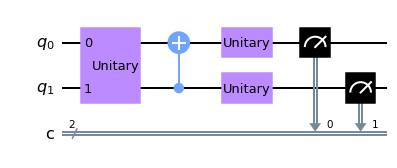

In [8]:
import numpy as np

# Create an operator
XX = Operator(Pauli(label='XX'))

# Add to a circuit
circ = QuantumCircuit(2, 2)
circ.append(XX, [0, 1])
circ.cx(1, 0)
circ.append(Operator([[1j, 0.], [0., -1j]]), [1])


import scipy

# some Hermitian
H = np.array([[1, -1/3], [-1/3, 1]])

# Get it's Unitary
U = scipy.linalg.expm(1j * H)
circ.append(Operator(U), [0])

circ.measure([0,1], [0,1])
circ.draw('mpl')

If Operator is Unitary, life is easier!

In [9]:
from qiskit.compiler import transpile
from qiskit import BasicAer

backend = BasicAer.get_backend('qasm_simulator')
circ = transpile(circ, backend, basis_gates=['u1','u2','u3','cx'])
circ.draw()

global phase: 2.5708
     ┌────────────────┐┌───┐┌──────────────────────┐┌─┐   
q_0: ┤ U3(π,-π/2,π/2) ├┤ X ├┤ U3(0.66667,-π/2,π/2) ├┤M├───
     ├────────────────┤└─┬─┘└──────┬────────┬──────┘└╥┘┌─┐
q_1: ┤ U3(π,π/2,-π/2) ├──■─────────┤ U1(-π) ├────────╫─┤M├
     └────────────────┘            └────────┘        ║ └╥┘
c: 2/════════════════════════════════════════════════╩══╩═
                                                     0  1

Tensoring, composition, and linear combination

In [10]:
A = Operator(Pauli('X'))
B = Operator(Pauli('Z'))

AB = A.expand(B)
import numpy as np

np.allclose(AB.data, Operator(Pauli('ZX')).data)

print(A.compose(B))
print()
print(A + 3 * B)

Operator([[ 0.+0.j,  1.+0.j],
          [-1.+0.j,  0.+0.j]],
         input_dims=(2,), output_dims=(2,))

Operator([[ 3.+0.j,  1.+0.j],
          [ 1.+0.j, -3.+0.j]],
         input_dims=(2,), output_dims=(2,))


## TODO:

For a given Hamiltonian find it's gate implementation in Qasm. Use `expm()` to get unitary, `transpile()` and `decompose()` to get gates.

$H=\begin{pmatrix}0 & i \\ -i & 1\end{pmatrix}$.

JFYI [docs](https://qiskit.org/documentation/stubs/qiskit.circuit.library.U3Gate.html): $U3(\theta, \phi, \lambda) = RZ(\phi) RX(-\pi/2) RZ(\theta) RX(\pi/2) RZ(\lambda)$

In [11]:
import numpy as np
from scipy.linalg import expm
from qiskit.compiler import transpile
from qiskit import BasicAer

backend = BasicAer.get_backend('qasm_simulator')

H = np.array([[0, 1j], [-1j, 1]])

# your code here

global phase: 6.0398
     ┌───────────────────────────┐
q_0: ┤ U3(1.869,0.74338,0.74338) ├
     └───────────────────────────┘

# Fidelity
of channels (transformations) and states.

We may also compare operators using the `process_fidelity` function from the Quantum Information module. This is an information theoretic quantity for how close two quantum channels are to each other, and in the case of unitary operators it does not depend on global phase.

In [12]:
from qiskit.quantum_info import process_fidelity

# Two operators which differ only by phase
op_a = Operator(XGate())
op_b = np.exp(1j * 0.5) * Operator(XGate())

# Compute process fidelity
F = process_fidelity(op_a, op_b)
print('Process fidelity =', F)

Process fidelity = 1.0


In quantum mechanics, notably in quantum information theory, **fidelity is a measure of the "closeness" of two quantum states**. It expresses the probability that one state will pass a test to identify as the other.

For 2 density matrices, fidelity is defined as ${\displaystyle F(\rho ,\sigma )=\left(\operatorname {tr} {\sqrt {{\sqrt {\rho }}\sigma {\sqrt {\rho }}}}\right)^{2}}$.

If one of the states is a pure state this simplifies to $F(\rho_1, \rho_2) = \langle\psi_1|\rho_2|\psi_1\rangle$ where $\rho_1 = |\psi_1\rangle\!\langle\psi_1|$.

To measure fidelity of 2 quantum states we use [qiskit.quantum_info.`state_fidelity`](https://qiskit.org/documentation/stubs/qiskit.quantum_info.state_fidelity.html#qiskit.quantum_info.state_fidelity).

**F(ρ,σ) = 1 if and only if ρ = σ, since Ψρ = Ψσ implies ρ = σ.** Thus, state vectors should be equal up to global phase.

In [13]:
from qiskit.quantum_info import state_fidelity, process_fidelity, Statevector

qc = QuantumCircuit(2)
qc.x(1)
qc.z(1)
backend = BasicAer.get_backend('statevector_simulator')
result = execute(qc, backend).result()
state = result.get_statevector(qc)

# up to phase
print(state_fidelity(Statevector([0, 0, -1, 0]), state))
print(state_fidelity(Statevector([0, 0, 1, 0]), state))

print(state_fidelity(Statevector([0, 0, 0.8, 0.6]), state))

# orthogonal
print(state_fidelity(Statevector([0, 1, 0, 0]), state))

1.0
1.0
0.6400000000000001
0.0


## TODO
What is `state_fidelity` between $|+\rangle$ and $|-\rangle$? Theretically and in practice.

In [ ]:
# YOUR CODE HERE

# Aer, BasicAer, and simulators

[`BasicAer`](https://qiskit.org/documentation/apidoc/providers_basicaer.html) - A module of Python-based quantum simulators. Simulators are accessed via the BasicAer provider. Holds:
- `QasmSimulatorPy([configuration, provider])` - Python implementation of a qasm simulator.
- `StatevectorSimulatorPy([configuration, provider])` - Python statevector simulator.
- `UnitarySimulatorPy([configuration, provider])` - Python implementation of a unitary simulator.

--- 

[`Aer`](https://qiskit.org/documentation/apidoc/aer_provider.html). Holds:

**Simulator Backends**:
- `AerSimulator([configuration, properties, …])` - Noisy quantum circuit simulator backend.
- `PulseSimulator([configuration, properties, …])` - Pulse schedule simulator backend.
**Legacy Simulator Backends**
- `QasmSimulator([configuration, properties, …])` - Noisy quantum circuit simulator backend.
- `StatevectorSimulator([configuration, …])` - Ideal quantum circuit statevector simulator
- `UnitarySimulator([configuration, …])` - Ideal quantum circuit unitary simulator.


In [15]:
from qiskit import Aer, BasicAer

print(Aer.get_backend('aer_simulator').__repr__())
print(BasicAer.get_backend('qasm_simulator').__repr__())
print(Aer.get_backend('qasm_simulator').__repr__())  # legacy

AerSimulator('aer_simulator')
<QasmSimulatorPy('qasm_simulator')>
QasmSimulator('qasm_simulator')


In [16]:
qc = QuantumCircuit(2)
qc.x(0)
from qiskit import execute

# statevector
essense = execute(qc, BasicAer.get_backend('statevector_simulator')).result().get_statevector()
print(np.round_(essense, 4))

print()

# unitary
essense = BasicAer.get_backend('unitary_simulator').run(qc).result().get_unitary()
print(essense)
print()

# qasm
qc.measure_all()
essense = execute(qc, BasicAer.get_backend('qasm_simulator'), shots=10).result().get_counts()
print(essense)

[0.+0.j 1.+0.j 0.+0.j 0.+0.j]

[[0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]]

{'01': 10}


# IBMQ Backends

![](https://miro.medium.com/max/700/1*YuR-BtRRTxLQ5EXW8fbUEQ.png)

`Provider` - IBM Quantum Experience account provider. A server to ask about machines.

`Backend` - IBM Quantum Experience device. Quantum computer.

In [17]:
from qiskit import IBMQ

# IBMQ.save_account(TOKEN)
IBMQ.load_account()
print(list(IBMQ.providers()))

provider = IBMQ.get_provider('ibm-q')
lima = provider.get_backend("ibmq_lima")

nq = lima.configuration().n_qubits
my_limit = lima.job_limit().maximum_jobs
my_jobs = lima.job_limit().active_jobs

status = lima.status()
is_operational = status.operational
jobs_in_queue = status.pending_jobs

print(f"Works = {is_operational}, Queue = {jobs_in_queue}, My Job Limit = {my_jobs}/{my_limit}, Qubits = {nq}")

[<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>]
Works = True, Queue = 0, My Job Limit = 0/5, Qubits = 5


### Execution - syncronous

In [18]:
import time

##################################
qc = QuantumCircuit(2)
qc.h(0)
qc.cnot(0, 1)  # did you know?
qc.measure_all()
##################################

##### TRANSPILE FOR BACKEND ######
qc = transpile(qc, lima)
print(qc.draw())


job = lima.run(qc)
start_time = time.time()
job_status = job.status()

from qiskit.tools.monitor import job_monitor
from time import time

start = time()
job_monitor(job)
end = time()

print(job.status(), job.result().get_counts())

global phase: π/4
               ┌─────────┐┌────┐┌─────────┐      ░ ┌─┐   
      q_0 -> 0 ┤ Rz(π/2) ├┤ √X ├┤ Rz(π/2) ├──■───░─┤M├───
               └─────────┘└────┘└─────────┘┌─┴─┐ ░ └╥┘┌─┐
      q_1 -> 1 ────────────────────────────┤ X ├─░──╫─┤M├
                                           └───┘ ░  ║ └╥┘
ancilla_0 -> 2 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_1 -> 3 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
ancilla_2 -> 4 ─────────────────────────────────────╫──╫─
                                                    ║  ║ 
       meas: 2/═════════════════════════════════════╩══╩═
                                                    0  1 
Job Status: job has successfully run
JobStatus.DONE {'00': 508, '01': 28, '10': 52, '11': 436}


# Coupling Map

[Limitation, which shows allowed `CNOT` interactions between qubits](https://qiskit.org/documentation/stubs/qiskit.transpiler.CouplingMap.html).

In [ ]:
!pip install networkx

[[0, 1], [1, 0], [1, 2], [1, 3], [2, 1], [3, 1], [3, 4], [4, 3]]


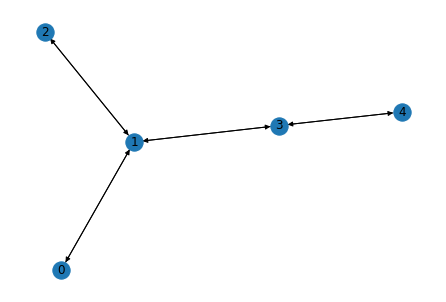

In [20]:
backend = provider.get_backend("ibmq_lima")
coupling_map = backend.configuration().coupling_map
print(coupling_map)

import networkx as nx
G = nx.DiGraph()
G.add_edges_from(coupling_map)
pos = nx.draw(G, with_labels = True)

## TODO
How this affects the circuit? transpile it for the `lima` backend.

In [ ]:
qc = QuantumCircuit(5)
qc.cnot(0, 4)

# TODO your code here

Emulate coupling_map on a simulator.

In [22]:
simulator = BasicAer.get_backend('qasm_simulator')
cm = [[1, 0], [2, 1], [3, 2], [4, 3]]
qcq = transpile(qc, simulator, coupling_map=cm)
print(qcq.draw())

# shorter
job = execute(qc, backend=simulator, shots=10, coupling_map=cm)
job.result().get_counts()

No classical registers in circuit "circuit-146", counts will be empty.


         ┌───┐┌──────────┐┌───┐┌──────────┐┌───┐                      »
q_4 -> 0 ┤ X ├┤ U2(0,-π) ├┤ X ├┤ U2(0,-π) ├┤ X ├──────────────────────»
         └─┬─┘├──────────┤└─┬─┘├──────────┤└─┬─┘┌───┐┌──────────┐┌───┐»
q_3 -> 1 ──■──┤ U2(0,-π) ├──■──┤ U2(0,-π) ├──■──┤ X ├┤ U2(0,-π) ├┤ X ├»
              └──────────┘     └──────────┘     └─┬─┘├──────────┤└─┬─┘»
q_2 -> 2 ─────────────────────────────────────────■──┤ U2(0,-π) ├──■──»
         ┌───┐┌──────────┐┌───┐┌──────────┐┌───┐     └──────────┘     »
q_1 -> 3 ┤ X ├┤ U2(0,-π) ├┤ X ├┤ U2(0,-π) ├┤ X ├──────────────────────»
         └─┬─┘├──────────┤└─┬─┘├──────────┤└─┬─┘                      »
q_0 -> 4 ──■──┤ U2(0,-π) ├──■──┤ U2(0,-π) ├──■────────────────────────»
              └──────────┘     └──────────┘                           »
«                               
«q_4 -> 0 ──────────────────────
«         ┌──────────┐┌───┐     
«q_3 -> 1 ┤ U2(0,-π) ├┤ X ├─────
«         ├──────────┤└─┬─┘┌───┐
«q_2 -> 2 ┤ U2(0,-π) ├──■──┤ X ├
«         

{}

# Some other gates

$T^\dagger$ = `tdg()` - [doc](https://qiskit.org/documentation/stubs/qiskit.circuit.library.TdgGate.html) (rotation $e^{-i\pi/4}$).

$CCCCCCX$ = Multi-Control X = `mct(control[], target)` - [doc](https://qiskit.org/documentation/stubs/qiskit.circuit.library.MCXGate.html#qiskit.circuit.library.MCXGate).

## Measurement

- `measure` - Measure quantum bit into classical bit (tuples).
- `measure_active` - Adds measurement to all non-idle qubits.
- `measure_all` - Adds measurement to all qubits.
- `remove_final_measurements` - Removes final measurement on all qubits if they are present.

In [23]:
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister

qc = QuantumCircuit(QuantumRegister(2, name="q"), ClassicalRegister(2, name="c"))
qc.x(0)

# those which were used
qc.measure_active()
print(qc.draw())

qc.measure([0], [1])
qc.measure(1, 0)

print(qc.draw())

# create a new classical register
qc.measure_all()
print(qc.draw())

qc.remove_final_measurements()
print(qc.draw())

           ┌───┐ ░ ┌─┐
      q_0: ┤ X ├─░─┤M├
           └───┘ ░ └╥┘
      q_1: ──────░──╫─
                 ░  ║ 
      c: 2/═════════╬═
                    ║ 
measure: 1/═════════╩═
                    0 
           ┌───┐ ░ ┌─┐   ┌─┐
      q_0: ┤ X ├─░─┤M├───┤M├
           └───┘ ░ └╥┘┌─┐└╥┘
      q_1: ──────░──╫─┤M├─╫─
                 ░  ║ └╥┘ ║ 
      c: 2/═════════╬══╩══╩═
                    ║  0  1 
                    ║       
measure: 1/═════════╩═══════
                    0       
           ┌───┐ ░ ┌─┐   ┌─┐ ░ ┌─┐   
      q_0: ┤ X ├─░─┤M├───┤M├─░─┤M├───
           └───┘ ░ └╥┘┌─┐└╥┘ ░ └╥┘┌─┐
      q_1: ──────░──╫─┤M├─╫──░──╫─┤M├
                 ░  ║ └╥┘ ║  ░  ║ └╥┘
      c: 2/═════════╬══╩══╩═════╬══╬═
                    ║  0  1     ║  ║ 
                    ║           ║  ║ 
measure: 1/═════════╩═══════════╬══╬═
                    0           ║  ║ 
                                ║  ║ 
   meas: 2/═════════════════════╩══╩═
                                0  1 
     ┌───

# Visualization

[Just a reminder](https://en.wikipedia.org/wiki/Quantum_state).

**Quantum state** -- a mathematical entity that provides a **probability distribution** for the outcomes of each possible measurement (observables, basis) on a system. Observables define a **measurement basis** as observable operator eigenvalues.

**Pure state** -- a mixture of quantum states is again a quantum state. Quantum states that cannot be written as a mixture of other states are called pure quantum states. All other states are called *mixed quantum states*.

**Pure states are also known as state vectors**. Mixed states are combinations of pure states.

A pure quantum state can be represented by a ray in a Hilbert space over the complex numbers $|\psi\rangle \rightarrow \rho=|\psi\rangle\langle\psi|$, while mixed states are represented by density matrices $\rho=\sum_{s}p_s|\psi_s\rangle\langle\psi_s|$.

Mixed states inevitably arise from pure states when, for a composite quantum system $H_{1}\otimes H_{2}$ with an entangled state on it, the part $H_{2}$ is inaccessible to the observer. The state of the part $H_{1}$ is expressed then as the partial trace over $H_{2}$:

![](https://upload.wikimedia.org/wikipedia/commons/thumb/8/85/Partial_Trace.svg/320px-Partial_Trace.svg.png)

Left hand side shows a full density matrix $\rho _{{AB}}$ of a bipartite qubit system. The partial trace is performed over a subsystem of 2 by 2 dimension (single qubit density matrix). The right hand side shows the resulting 2 by 2 reduced density matrix $\rho _{{A}}$.


On [density matrix](https://en.wikipedia.org/wiki/Density_matrix).

### Histogram

An empirical plot of a dictionary, results of shots. This is a wrapper over matplotlib.

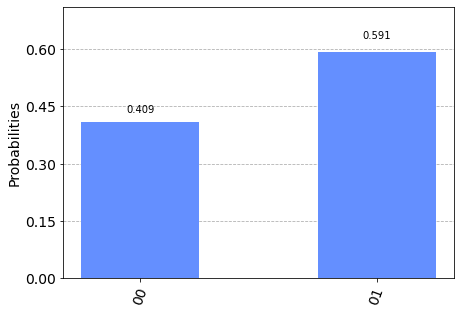

In [24]:
from qiskit import *
from qiskit.visualization import plot_histogram

plot_histogram({
    "00": 217, 
    "01": 314
})

Histogam supports multiple experiments and some `kwargs`. You can also save it!

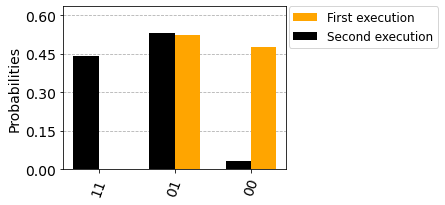

In [25]:
# %matplotlib inline
import matplotlib.pyplot as plt

legend = ['First execution', 'Second execution']
plot_histogram([{
                    "00": 10,
                    "01": 11
                }, 
               {
                   "00": 7,
                   "01": 120,
                   "11": 100
               }], 
                legend=legend,     # names of experiment
                sort='desc',       # how we sort the labels  
                figsize=(4,3),     # size of the plot
                color=['orange', 'black'], # guess what?
                bar_labels=False,  # don't show numbers
)  # .savefig("plot.svg")

### Plotting a quantum state

!! $\rho=|\psi\rangle\langle\psi|$

- `plot_state_city(quantum_state)` -- 3D plot of density matrix values. Accepts a vector or a matrix. Real an imagimary a separate.
- `plot_state_qsphere(quantum_state)` -- amplitude and phase of the state vector are plotted in a spherical ball. The amplitude is the thickness of the arrow and the phase is the color. For mixed states it will show different 'qsphere' for each component. The nodes are laid out on the q-sphere so that the basis state with all zeros (e.g., $|000\rangle$ is at its north pole, and the basis state with all ones (e.g., $|111\rangle$) is at its south pole. Basis states with the same number of zeros (or ones) lie on a shared latitude of the q-sphere. [docs](https://quantum-computing.ibm.com/composer/docs/iqx/visualizations#q-sphere-view).
- `plot_state_paulivec(quantum_state)` -- The representation of the state matrix using Pauli operators as the basis. $\rho=\sum_{q=0}^{d^2-1}p_jP_j/d$.
- `plot_state_hinton(quantum_state)` -- Same as 'city' but where the size of the element represents the value of the matrix element.
- `plot_bloch_multivector(quantum_state)` -- The projection of the quantum state onto the single qubit space and plotting on a bloch sphere.

In [26]:
from qiskit.visualization import plot_state_city, plot_bloch_multivector
from qiskit.visualization import plot_state_paulivec, plot_state_hinton
from qiskit.visualization import plot_state_qsphere

In [27]:
bell = QuantumCircuit(2, 2)
bell.h(0)
bell.cx(0, 1)

In [28]:
backend = BasicAer.get_backend('statevector_simulator') # the device to run on
result = backend.run(transpile(bell, backend)).result()
psi  = result.get_statevector(bell)

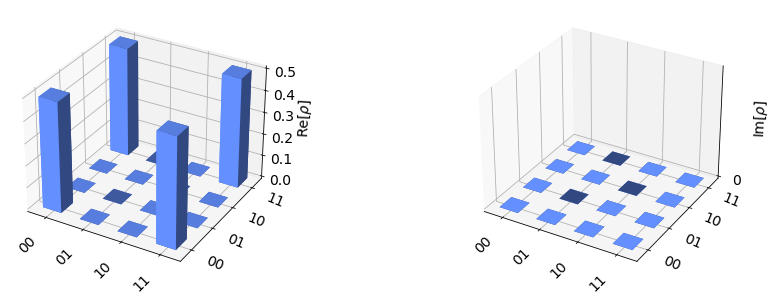

In [29]:
plot_state_city(psi)

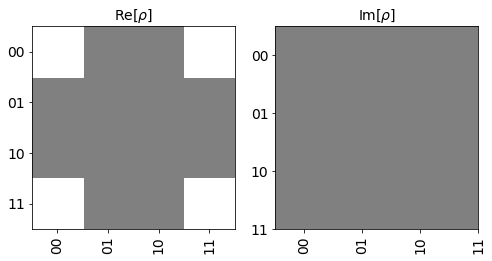

In [30]:
plot_state_hinton(psi)

C:\anaconda\envs\qiskit\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


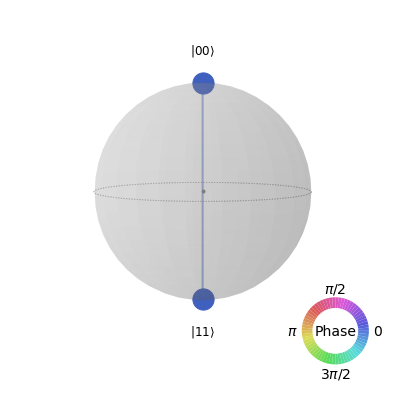

In [31]:
plot_state_qsphere(psi)

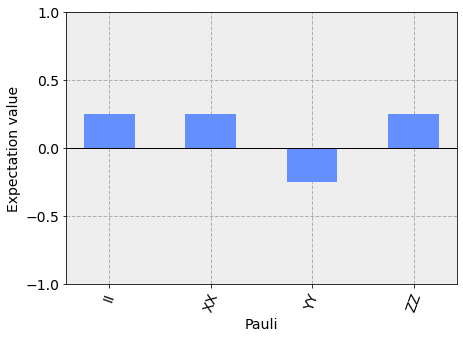

In [32]:
plot_state_paulivec(psi)

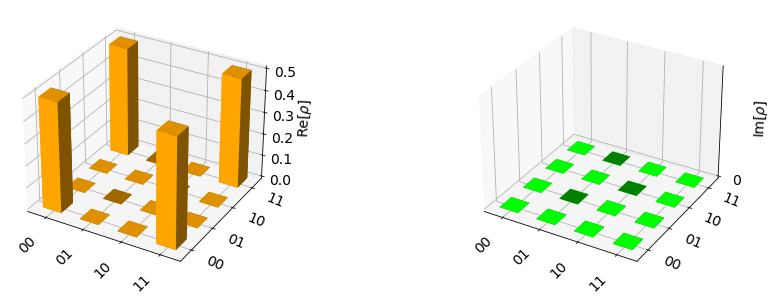

In [33]:
import numpy as np
## verify:

II = np.eye(4)
X = 1 - np.eye(2)
Y = np.array([[0, 1j], [-1j, 0]])
Z = np.array([[1, 0], [0, -1]])
XX = np.kron(X, X)
YY = np.kron(Y, Y)
ZZ = np.kron(Z, Z)

plot_state_city(
    0.25 * (II + XX + ZZ) - 0.25 * YY,
    color=['orange', 'lime']
)

C:\anaconda\envs\qiskit\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


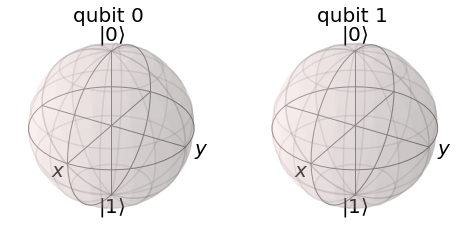

In [34]:
# Here we see that there is no information about the quantum state
plot_bloch_multivector(psi)

C:\anaconda\envs\qiskit\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


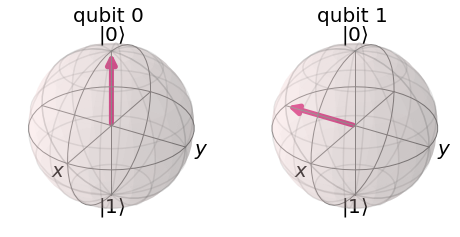

In [35]:
plot_bloch_multivector([-(0.5 ** 0.5), 0, (0.5 ** 0.5) * 1j, 0])

## TODO

Plot QSphere, Bloch multivector and city map for $|+-0\rangle$ state.

In [ ]:
import numpy as np

# YOUR CODE HERE

### `plot_bloch_vector`
$Phase(\frac{\pi}{2})|+\rangle=\frac{1}{\sqrt{2}}|0\rangle+\frac{1}{\sqrt{2}}e^{\frac{1}{2}i\pi}|1\rangle=\frac{1}{\sqrt{2}}|0\rangle+\frac{i}{\sqrt{2}}|1\rangle$.

This vector should lay in $XY$ plane ($Z=0$), and phase component shows in should be outside $XZ$ circle, precisely, collinear to $Y$ ($X=0$, $Y=1$).

The most tricky thing here. As for documentation, The Bloch vector is defined as $[x=Tr[Xρ],y=Tr[Yρ],z=Tr[Zρ]]$. And this doesn't work.

In [40]:
v = np.array([[0.5 ** 0.5, (0.5 ** 0.5) * np.exp(1j * np.pi / 2)]]).T
print("Vector:")
print(v)
rho = v @ v.T
print("Density Matrix:")
print(np.round_(rho, 3))
trX = (X @ rho)[0, 0] + (X @ rho)[1, 1]
trY = (Y @ rho)[0, 0] + (Y @ rho)[1, 1]
trZ = (Z @ rho)[0, 0] + (Z @ rho)[1, 1]
bvec = np.array((trX, trY, trZ))
print(bvec)

Vector:
[[7.07106781e-01+0.j        ]
 [4.32978028e-17+0.70710678j]]
Density Matrix:
[[ 0.5+0.j   0. +0.5j]
 [ 0. +0.5j -0.5+0.j ]]
[6.123234e-17+1.000000e+00j 0.000000e+00+0.000000e+00j
 1.000000e+00-6.123234e-17j]


C:\anaconda\envs\qiskit\lib\site-packages\qiskit\visualization\bloch.py:397: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  self.axes = Axes3D(self.fig, azim=self.view[0], elev=self.view[1])
C:\anaconda\envs\qiskit\lib\site-packages\qiskit\visualization\bloch.py:69: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  x_s, y_s, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


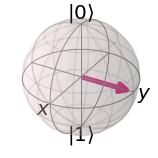

In [41]:
from qiskit.visualization import plot_bloch_vector

plot_bloch_vector([0, 1, 0], figsize=(2, 2))

# Plotting a circuit
[based on](https://qiskit.org/documentation/tutorials/circuits_advanced/03_advanced_circuit_visualization.html).

In [42]:
from qiskit import QuantumCircuit, ClassicalRegister, QuantumRegister

# Build a quantum circuit
circuit = QuantumCircuit(3, 3)

circuit.x(1)
circuit.h(range(3))
circuit.cx(0, 1)
circuit.barrier()
circuit.measure(range(3), range(3))

print(circuit)

     ┌───┐           ░ ┌─┐      
q_0: ┤ H ├───────■───░─┤M├──────
     ├───┤┌───┐┌─┴─┐ ░ └╥┘┌─┐   
q_1: ┤ X ├┤ H ├┤ X ├─░──╫─┤M├───
     ├───┤└───┘└───┘ ░  ║ └╥┘┌─┐
q_2: ┤ H ├───────────░──╫──╫─┤M├
     └───┘           ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2 


In [43]:
circuit.draw()

┌───┐           ░ ┌─┐      
q_0: ┤ H ├───────■───░─┤M├──────
     ├───┤┌───┐┌─┴─┐ ░ └╥┘┌─┐   
q_1: ┤ X ├┤ H ├┤ X ├─░──╫─┤M├───
     ├───┤└───┘└───┘ ░  ║ └╥┘┌─┐
q_2: ┤ H ├───────────░──╫──╫─┤M├
     └───┘           ░  ║  ║ └╥┘
c: 3/═══════════════════╩══╩══╩═
                        0  1  2

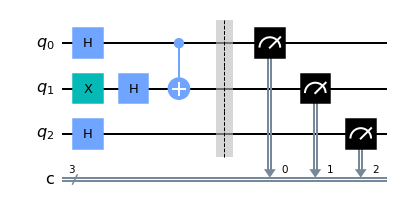

In [44]:
# Matplotlib Drawing
circuit.draw(output='mpl')

The `draw()` method has optional arguments to display or save the output. When specified, the filename kwarg takes a path to which it saves the rendered output.

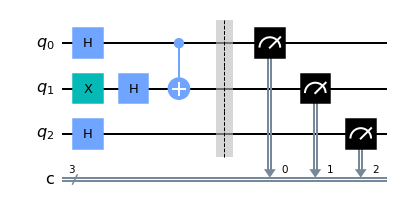

In [45]:
circuit.draw(output='mpl', filename='circuit.jpg')

`interactive` kwarg to open the image in a new window (this will not always work from within a notebook but will be demonstrated anyway).

C:\anaconda\envs\qiskit\lib\site-packages\qiskit\visualization\circuit_visualization.py:259: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  image.show()


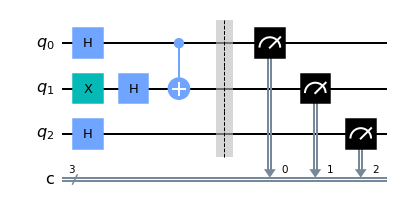

In [46]:
circuit.draw(output='mpl', interactive=True)

Flips the diagram, and removes the barriers:

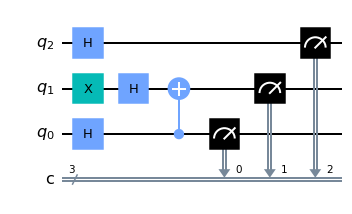

In [47]:
circuit.draw(output='mpl', reverse_bits=True, plot_barriers=False)

You can [manipulate some drawing parameter](https://qiskit.org/documentation/tutorials/circuits_advanced/03_advanced_circuit_visualization.html#Backend-specific-customizations).

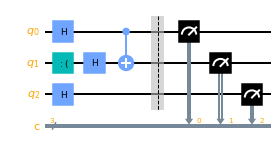

In [48]:
style = {
    'textcolor': 'orange',
    'displaytext': {'x' : ':('},
    'fontsize': 9,
}

circuit.draw(output='mpl', style=style)

# Plot gate map

ibmqfactory.load_account:WARNING:2021-11-24 11:42:56,088: Credentials are already in use. The existing account in the session will be replaced.


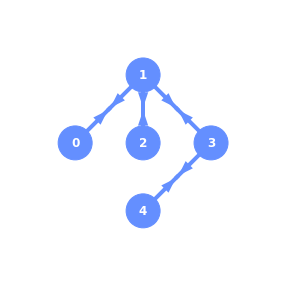

In [49]:
from qiskit import QuantumCircuit, execute, IBMQ
from qiskit.visualization import plot_gate_map
%matplotlib inline

provider = IBMQ.load_account()
accountProvider = IBMQ.get_provider(hub='ibm-q')
backend = accountProvider.get_backend('ibmq_lima')
plot_gate_map(
    backend,
    plot_directed=True,
)

In [50]:
for gate_i in backend.properties().gates:
    if 'cx' in gate_i.name:
        print("{} gate on qubits {} error rate is {}{}".format(gate_i.name, gate_i.qubits, gate_i.parameters[0].value, gate_i.parameters[0].unit))

cx4_3 gate on qubits [4, 3] error rate is 0.02020596639720343
cx3_4 gate on qubits [3, 4] error rate is 0.02020596639720343
cx0_1 gate on qubits [0, 1] error rate is 0.00857911060726213
cx1_0 gate on qubits [1, 0] error rate is 0.00857911060726213
cx3_1 gate on qubits [3, 1] error rate is 0.021288922409469696
cx1_3 gate on qubits [1, 3] error rate is 0.021288922409469696
cx2_1 gate on qubits [2, 1] error rate is 0.01676007197341961
cx1_2 gate on qubits [1, 2] error rate is 0.01676007197341961
